In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.statespace.varmax import VARMAX


drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import datetime as dt
from datetime import datetime

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NBA_Models/lakers_augmented_data_{timestamp}.csv'.format(timestamp=datetime.now().strftime('%m-%d-%Y')), index_col=0)

In [33]:
df

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,PTS,GmSc,+/-,Game,Home,Final_Score_Delta,PERSON_ID,TEAM_ID,Played
0,00:37:35,11.0,23.0,0.478,1.0,3.0,0.333,13.0,15.0,0.867,...,1.0,36.0,34.0,1.0,1,0,7,203076,1610612750,1
1,00:36:02,6.0,14.0,0.429,0.0,5.0,0.000,0.0,1.0,0.000,...,4.0,12.0,11.4,12.0,1,0,7,1630559,1610612750,1
2,00:35:05,7.0,14.0,0.500,1.0,4.0,0.250,3.0,4.0,0.750,...,2.0,18.0,15.9,19.0,1,0,7,1629060,1610612750,1
3,00:34:39,7.0,16.0,0.438,1.0,4.0,0.250,1.0,1.0,1.000,...,3.0,16.0,10.1,-6.0,1,0,7,2544,1610612750,1
4,00:34:13,4.0,12.0,0.333,1.0,7.0,0.143,0.0,0.0,0.000,...,2.0,9.0,6.2,15.0,1,0,7,1626156,1610612750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,00:13:29,0.0,3.0,0.000,0.0,2.0,0.000,2.0,2.0,1.000,...,1.0,2.0,3.2,1.0,34,0,-4,1629003,1610612737,1
391,00:12:50,1.0,2.0,0.500,1.0,2.0,0.500,0.0,0.0,0.000,...,1.0,3.0,3.0,1.0,34,0,-4,1629629,1610612737,1
392,00:10:42,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,...,0.0,3.0,1.9,0.0,34,0,-4,1629637,1610612737,1
393,00:01:41,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,2.0,34,0,-4,1642355,1610612737,1


In [5]:
df['MP'] = df['MP'].fillna(pd.to_datetime('00:00:00').time())
df.fillna(0, inplace=True)

In [6]:
df

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,PTS,GmSc,+/-,Game,Home,Final_Score_Delta,PERSON_ID,TEAM_ID,Played
0,00:37:35,11.0,23.0,0.478,1.0,3.0,0.333,13.0,15.0,0.867,...,1.0,36.0,34.0,1.0,1,0,7,203076,1610612750,1
1,00:36:02,6.0,14.0,0.429,0.0,5.0,0.000,0.0,1.0,0.000,...,4.0,12.0,11.4,12.0,1,0,7,1630559,1610612750,1
2,00:35:05,7.0,14.0,0.500,1.0,4.0,0.250,3.0,4.0,0.750,...,2.0,18.0,15.9,19.0,1,0,7,1629060,1610612750,1
3,00:34:39,7.0,16.0,0.438,1.0,4.0,0.250,1.0,1.0,1.000,...,3.0,16.0,10.1,-6.0,1,0,7,2544,1610612750,1
4,00:34:13,4.0,12.0,0.333,1.0,7.0,0.143,0.0,0.0,0.000,...,2.0,9.0,6.2,15.0,1,0,7,1626156,1610612750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,00:13:29,0.0,3.0,0.000,0.0,2.0,0.000,2.0,2.0,1.000,...,1.0,2.0,3.2,1.0,34,0,-4,1629003,1610612737,1
391,00:12:50,1.0,2.0,0.500,1.0,2.0,0.500,0.0,0.0,0.000,...,1.0,3.0,3.0,1.0,34,0,-4,1629629,1610612737,1
392,00:10:42,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,0.500,...,0.0,3.0,1.9,0.0,34,0,-4,1629637,1610612737,1
393,00:01:41,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,2.0,34,0,-4,1642355,1610612737,1


In [7]:
y = df[['Game', 'Final_Score_Delta']].set_index('Game').groupby('Game').agg('max')

unflatten_X = pd.get_dummies(df[['PERSON_ID', 'TEAM_ID']].astype(str)) # Use double square brackets to select multiple columns
unflatten_X['MP'] = df['MP'].apply(lambda x: pd.to_datetime(str(x)).time())
unflatten_X['Home'] = df['Home']
unflatten_X['Game'] = df['Game']

In [8]:
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home,Game
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:37:35,0,1
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,00:36:02,0,1
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,00:35:05,0,1
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:34:39,0,1
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:34:13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:13:29,0,34
391,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,00:12:50,0,34
392,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,00:10:42,0,34
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:01:41,0,34


In [9]:
y

,Final_Score_Delta
Game,
1,7
2,4
3,-4
4,-24
5,6
6,-12
7,-17
8,10
9,20


In [10]:
unflatten_X['MP'] = unflatten_X['MP'].apply(lambda x: (x.hour * 60 + x.minute * 60 + x.second) if isinstance(x, dt.time) else x)

# Ensure all columns in X and y are numeric
unflatten_X = unflatten_X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)  # Convert to numeric, fill NaNs with 0
unflatten_X['Game'] = unflatten_X['Game'].astype(int)  # Convert to numeric, fill NaNs with 0

In [11]:
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home,Game
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2105.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2079.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0,34
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,0.0,34
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,34
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,34




```
interacting_variables = pd.DataFrame()
interacting_variables['MPxPTSxFinalScorexPlayed'] = y['MP'] * y['PTS']*y['TRB']
interacting_variables['MPxPTSxTRBxAST'] = y['MP'] * y['PTS']*y['TRB']*y['AST']
interacting_variables['PTSxBLKxFinalScore'] = y['MP'] * y['PTS']*y['BLK']*y['Final_Score_Delta']
interacting_variables['TRBxASTxFinalScore'] = y['MP'] * y['TRB']*y['AST']*y['Final_Score_Delta']
interacting_variables['HomexFinalScore'] = y['MP'] * y['TRB']*y['BLK']*y['Final_Score_Delta']


lags = 1  # Define the number of lags

for col in interacting_variables.columns:
    for i in range(1, lags + 1):
        interacting_variables[f'{col}_lag_{i}'] = interacting_variables[col].shift(i)


# Add lagged interacting variables to X
for col in interacting_variables.columns:
    for i in range(1, lags + 1):
        if f'{col}_lag_{i}' in interacting_variables:
            X[f'{col}_lag_{i}'] = interacting_variables[f'{col}_lag_{i}']
```



In [12]:
unflatten_X.set_index('Game', inplace=True)
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612757,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home
Game,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2105.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2079.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0


In [13]:
player_columns = [col for col in unflatten_X.columns if 'PERSON_ID' in col]
X = pd.DataFrame()

for col in player_columns:
    new_col_name = col.replace('PERSON_ID_', 'MP_PLAYER_')
    X[new_col_name] = unflatten_X[col] * unflatten_X['MP']

X = X.groupby('Game').sum()
X

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,MP_PLAYER_1631108,MP_PLAYER_1631132,MP_PLAYER_1641720,MP_PLAYER_1641721,MP_PLAYER_1642261,MP_PLAYER_1642355,MP_PLAYER_1642439,MP_PLAYER_203076,MP_PLAYER_2544
Game,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,685.0,0.0,0.0,0.0,947.0,161.0,0.0,2255.0,2079.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,685.0,0.0,0.0,0.0,799.0,0.0,0.0,2250.0,2082.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,1074.0,0.0,0.0,0.0,1210.0,0.0,0.0,2265.0,2026.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,1390.0,0.0,0.0,0.0,674.0,0.0,0.0,2130.0,2148.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,1636.0,0.0,0.0,0.0,1349.0,316.0,0.0,1880.0,1738.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,795.0,0.0,0.0,0.0,1147.0,7.0,0.0,2143.0,2175.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,252.0,0.0,0.0,0.0,521.0,0.0,0.0,2340.0,2400.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,1162.0,800.0,0.0,0.0,1612.0,275.0,0.0,0.0,2125.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,88.0,88.0,88.0,88.0,970.0,88.0,0.0,2129.0,2028.0


In [14]:
remaining_columns = [col for col in unflatten_X.columns if 'TEAM_ID' in col or 'Home' in col]

X=X.join(unflatten_X[remaining_columns].drop_duplicates(), on='Game').rename(columns={col: col.replace('TEAM_ID_', 'TEAM_') for col in remaining_columns})

team_columns = [col for col in X.columns if 'TEAM_' in col]


for col in team_columns:
    new_col_name = col.replace('TEAM_', 'HomexTEAM_')
    X[new_col_name] = X[col] * X['Home']

X

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X.columns

Index(['MP_PLAYER_1626156', 'MP_PLAYER_1626174', 'MP_PLAYER_1627827',
       'MP_PLAYER_1629003', 'MP_PLAYER_1629020', 'MP_PLAYER_1629060',
       'MP_PLAYER_1629216', 'MP_PLAYER_1629629', 'MP_PLAYER_1629637',
       'MP_PLAYER_1630559', 'MP_PLAYER_1631108', 'MP_PLAYER_1631132',
       'MP_PLAYER_1641720', 'MP_PLAYER_1641721', 'MP_PLAYER_1642261',
       'MP_PLAYER_1642355', 'MP_PLAYER_1642439', 'MP_PLAYER_203076',
       'MP_PLAYER_2544', 'TEAM_1610612737', 'TEAM_1610612739',
       'TEAM_1610612740', 'TEAM_1610612743', 'TEAM_1610612744',
       'TEAM_1610612748', 'TEAM_1610612750', 'TEAM_1610612753',
       'TEAM_1610612755', 'TEAM_1610612756', 'TEAM_1610612757',
       'TEAM_1610612758', 'TEAM_1610612759', 'TEAM_1610612760',
       'TEAM_1610612761', 'TEAM_1610612762', 'TEAM_1610612763',
       'TEAM_1610612765', 'Home', 'HomexTEAM_1610612737',
       'HomexTEAM_1610612739', 'HomexTEAM_1610612740', 'HomexTEAM_1610612743',
       'HomexTEAM_1610612744', 'HomexTEAM_1610612748', 'Homex

In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Final_Score_Delta  34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


In [17]:
y

,Final_Score_Delta
Game,
1,7
2,4
3,-4
4,-24
5,6
6,-12
7,-17
8,10
9,20


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MP_PLAYER_1626156     34 non-null     float64
 1   MP_PLAYER_1626174     34 non-null     float64
 2   MP_PLAYER_1627827     34 non-null     float64
 3   MP_PLAYER_1629003     34 non-null     float64
 4   MP_PLAYER_1629020     34 non-null     float64
 5   MP_PLAYER_1629060     34 non-null     float64
 6   MP_PLAYER_1629216     34 non-null     float64
 7   MP_PLAYER_1629629     34 non-null     float64
 8   MP_PLAYER_1629637     34 non-null     float64
 9   MP_PLAYER_1630559     34 non-null     float64
 10  MP_PLAYER_1631108     34 non-null     float64
 11  MP_PLAYER_1631132     34 non-null     float64
 12  MP_PLAYER_1641720     34 non-null     float64
 13  MP_PLAYER_1641721     34 non-null     float64
 14  MP_PLAYER_1642261     34 non-null     float64
 15  MP_PLAYER_1642355     34 non-n

In [19]:
X.fillna(0, inplace=True)
X[:24]

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from statsmodels.tsa.arima.model import ARIMA

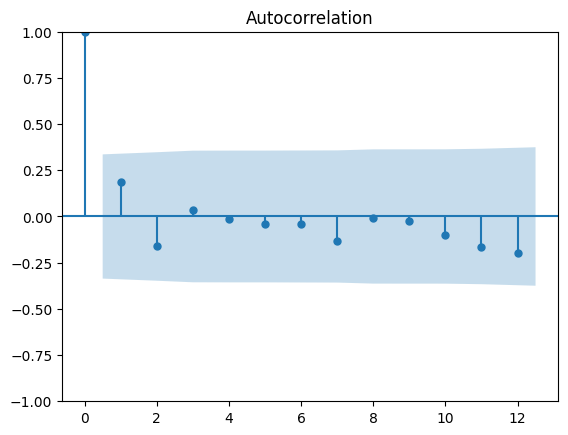

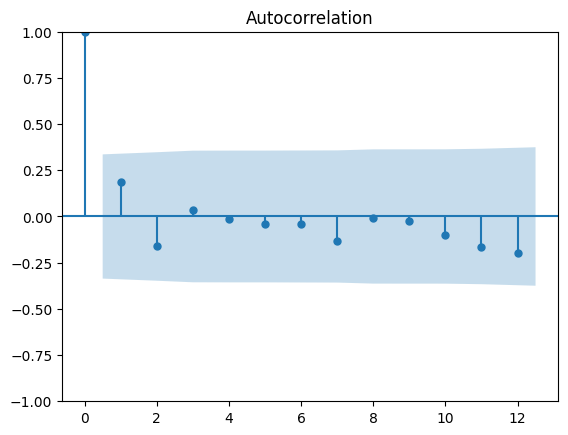

In [25]:
tsaplots.plot_acf(y, lags=12)

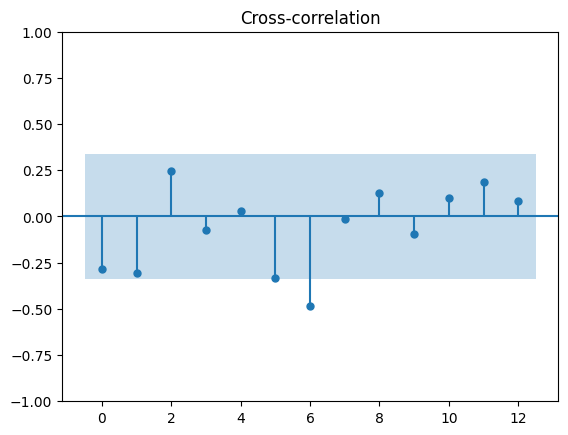

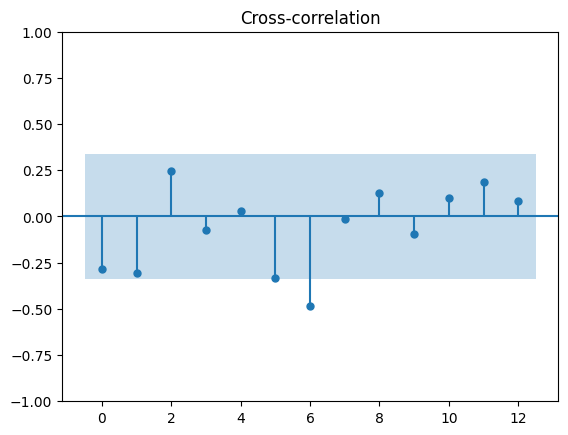

In [23]:

import statsmodels.graphics.tsaplots as tsaplots

tsaplots.plot_ccf(y, X['TEAM_1610612753'], lags=12)

In [43]:
model = ARIMA(y, exog=X, order=(1,0,0)) # You might need to adjust the order
results = model.fit()

# Print model summary
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Final_Score_Delta   No. Observations:                   34
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 359.232
Date:                Tue, 07 Jan 2025   AIC                           -600.463
Time:                        23:22:56   BIC                           -510.408
Sample:                             0   HQIC                          -569.752
                                 - 34                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2039    2.6e-23  -7.83e+21      0.000      -0.204      -0.204
MP_PLAYER_1626156       -0.0175   1.59e-19   -1.1e+17      0.000      -0.017      -0.017
MP_PLAYER_16

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


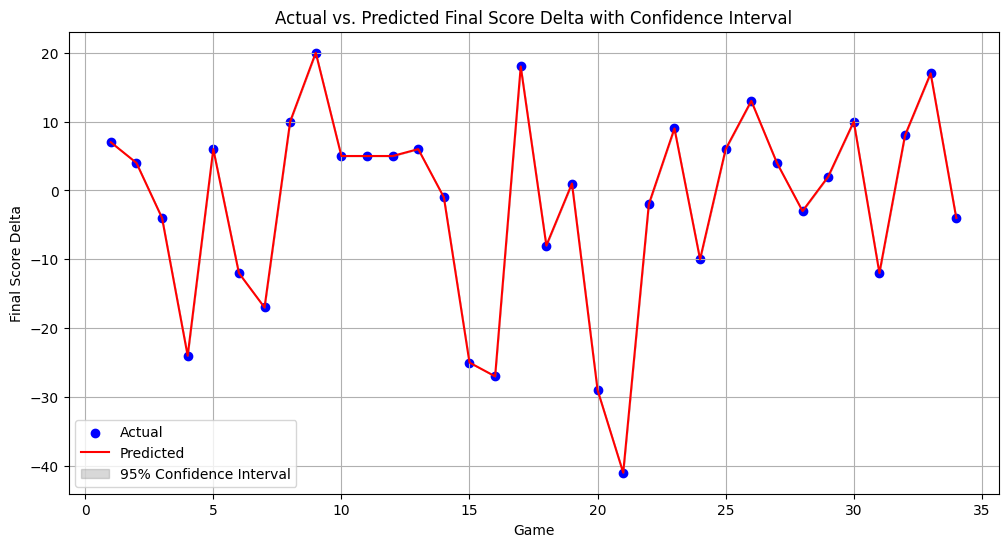

In [44]:

# Get the predicted values
predictions = results.get_prediction(start=0, end=len(y)-1, exog=X3)  # Adjust start and end as needed
predicted_mean = predictions.predicted_mean

# Calculate confidence intervals
confidence_intervals = predictions.conf_int()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the actual values as scatter points
plt.scatter(y.index, y['Final_Score_Delta'], label='Actual', marker='o', color='blue')

# Plot the predicted values as a line
plt.plot(y.index, predicted_mean, label='Predicted', color='red')

# Plot the confidence interval band
plt.fill_between(y.index, confidence_intervals['lower Final_Score_Delta'], confidence_intervals['upper Final_Score_Delta'], color='gray', alpha=0.3, label='95% Confidence Interval')


plt.xlabel('Game')
plt.ylabel('Final Score Delta')
plt.title('Actual vs. Predicted Final Score Delta with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import statsmodels.tsa.stattools as stm


stm.ccf(y, X['MP_PLAYER_1626156'])

array([-0.20464722,  0.10244396,  0.05667262, -0.28484509,  0.0422955 ,
        0.18733639, -0.03342319,  0.02898566,  0.13797293, -0.05242064,
       -0.08497017,  0.10484179, -0.15887198, -0.21868663, -0.29441811,
       -0.15147337,  0.05188834, -0.30008673, -0.15518905, -0.13161511,
       -0.04568098,  0.13175039,  0.16473368,  0.27467847,  0.19556913,
        0.17982586,  0.42342912,  0.19297766,  0.15668701,  0.49017147,
        0.18780173,  0.49281319,  0.68597163, -0.16730734])

# All stars only

In [27]:
# prompt: Among the MP_player columns in X, remove the columns that aren't '2544' or '203076'

import pandas as pd

# Assuming X is your DataFrame and it's already defined in your preceding code
# Replace this with your actual DataFrame if needed
# X = pd.DataFrame(...)

mp_player_cols = [col for col in X.columns if 'MP_PLAYER_' in col]
cols_to_keep = ['MP_PLAYER_2544', 'MP_PLAYER_203076']

# Filter the columns
cols_to_remove = [col for col in mp_player_cols if col not in cols_to_keep]
X2 = X.drop(columns=cols_to_remove)

In [28]:
X2

,MP_PLAYER_203076,MP_PLAYER_2544,TEAM_1610612737,TEAM_1610612739,TEAM_1610612740,TEAM_1610612743,TEAM_1610612744,TEAM_1610612748,TEAM_1610612750,TEAM_1610612753,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2255.0,2079.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2250.0,2082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2265.0,2026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2130.0,2148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1880.0,1738.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2143.0,2175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2340.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,2125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2129.0,2028.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


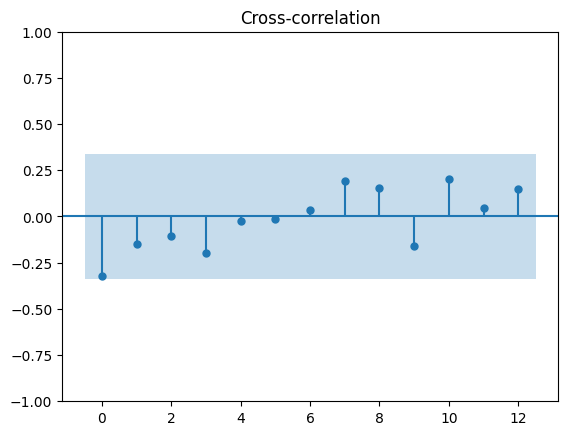

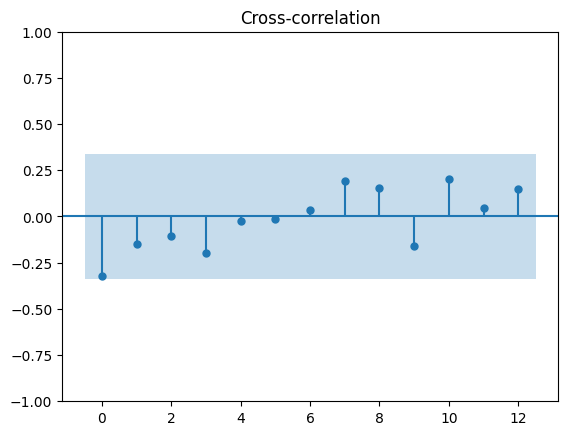

In [29]:
tsaplots.plot_ccf(y, X['MP_PLAYER_203076'], lags=12)

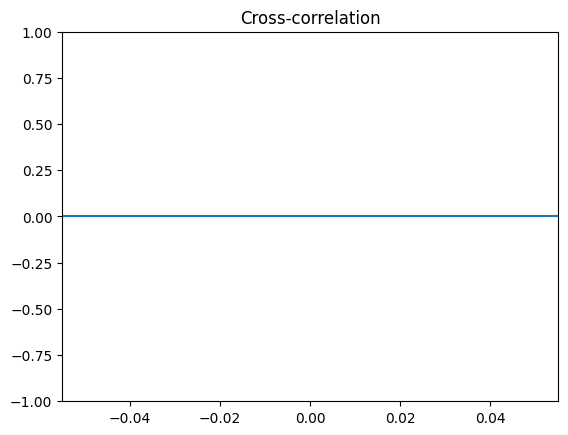

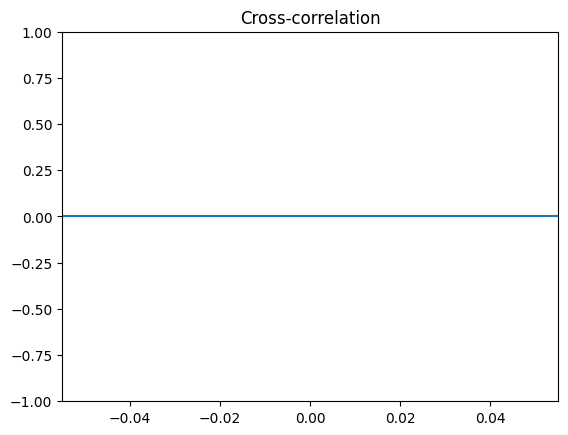

In [30]:
tsaplots.plot_ccf(y, X['MP_PLAYER_2544'].diff(), lags=12)

In [40]:
model = ARIMA(y, exog=X2, order=(1,0,0)) # You might need to adjust the order
results = model.fit()

# Print model summary
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Final_Score_Delta   No. Observations:                   34
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -95.863
Date:                Tue, 07 Jan 2025   AIC                            275.726
Time:                        23:21:51   BIC                            339.833
Sample:                             0   HQIC                           297.588
                                 - 34                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.2077     20.306      0.552      0.581     -28.591      51.007
MP_PLAYER_203076        -0.0061      0.009     -0.713      0.476      -0.023       0.011
MP_PLAYER_25

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


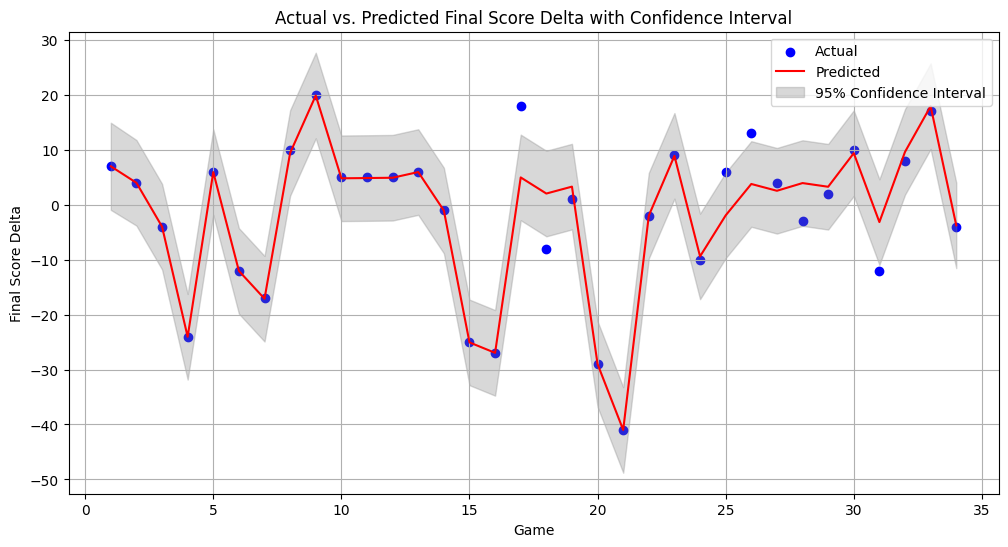

In [41]:

# Get the predicted values
predictions = results.get_prediction(start=0, end=len(y)-1, exog=X3)  # Adjust start and end as needed
predicted_mean = predictions.predicted_mean

# Calculate confidence intervals
confidence_intervals = predictions.conf_int()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the actual values as scatter points
plt.scatter(y.index, y['Final_Score_Delta'], label='Actual', marker='o', color='blue')

# Plot the predicted values as a line
plt.plot(y.index, predicted_mean, label='Predicted', color='red')

# Plot the confidence interval band
plt.fill_between(y.index, confidence_intervals['lower Final_Score_Delta'], confidence_intervals['upper Final_Score_Delta'], color='gray', alpha=0.3, label='95% Confidence Interval')


plt.xlabel('Game')
plt.ylabel('Final Score Delta')
plt.title('Actual vs. Predicted Final Score Delta with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# prompt: How do I export the model fitted results to a CSV?

# Assuming 'results' is your fitted ARIMA model

# Get the fitted values

# Create a DataFrame for the results
results_df = pd.DataFrame({results.params.index.tolist(): results.params.values.tolist()})

# Reset the index if needed (to make 'Game' a regular column)
results_df = results_df.reset_index()

# Export to CSV
results_df.to_csv('/content/drive/MyDrive/NBA_Models/arima_model.csv', index=False)

TypeError: unhashable type: 'list'

In [ ]:
results.params.values

In [ ]:
plt.plot(X['MP_PLAYER_203076'])

In [ ]:
plt.plot(X['MP_PLAYER_2544'])

In [34]:
# prompt: For the data frame X2, if in the MP_Player columns there are values greater than 0 then replace it with a value of 1. Otherwise keep it as 0. Save this new data frame to variable X3

X3 = X2.copy()  # Create a copy to avoid modifying the original DataFrame

# Iterate through columns starting with 'MP_PLAYER_'
for col in X3.columns:
    if col.startswith('MP_PLAYER_'):
        # Replace values greater than 0 with 1, otherwise keep as 0
        X3[col] = X3[col].apply(lambda x: 1 if x > 0 else 0)

In [35]:
model = ARIMA(y, exog=X3, order=(1,0,0)) # You might need to adjust the order
results = model.fit()

# Print model summary
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Final_Score_Delta   No. Observations:                   34
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -92.928
Date:                Tue, 07 Jan 2025   AIC                            269.855
Time:                        23:16:20   BIC                            333.962
Sample:                             0   HQIC                           291.717
                                 - 34                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.2502     54.856      0.351      0.726     -88.266     126.766
MP_PLAYER_203076       -18.7836     56.219     -0.334      0.738    -128.972      91.405
MP_PLAYER_25

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


--------

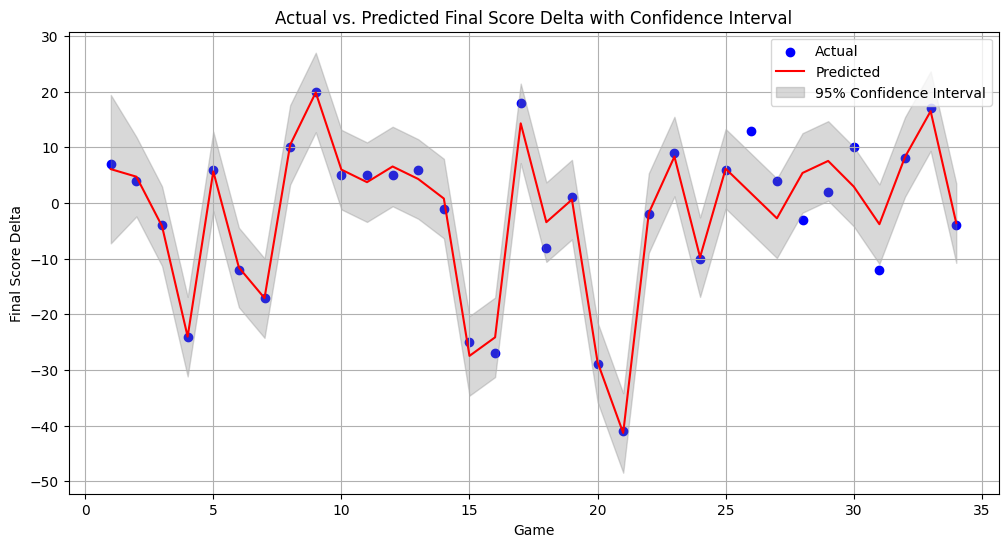

In [39]:
# prompt: create a scatter plot of the model results and add a confidence interval band. Make the predicted data points a line but leave the actual points as a scatter dot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'y' is your actual values and 'results' is your fitted ARIMA model
# Replace these with your actual data and model

# Get the predicted values
predictions = results.get_prediction(start=0, end=len(y)-1, exog=X3)  # Adjust start and end as needed
predicted_mean = predictions.predicted_mean

# Calculate confidence intervals
confidence_intervals = predictions.conf_int()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the actual values as scatter points
plt.scatter(y.index, y['Final_Score_Delta'], label='Actual', marker='o', color='blue')

# Plot the predicted values as a line
plt.plot(y.index, predicted_mean, label='Predicted', color='red')

# Plot the confidence interval band
plt.fill_between(y.index, confidence_intervals['lower Final_Score_Delta'], confidence_intervals['upper Final_Score_Delta'], color='gray', alpha=0.3, label='95% Confidence Interval')


plt.xlabel('Game')
plt.ylabel('Final Score Delta')
plt.title('Actual vs. Predicted Final Score Delta with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()